# Visualization in Python: Map and Embedded Charts  
Use data on Covid-19 confirmed and death cases.  Data source is here:  https://github.com/CSSEGISandData/COVID-19

In [1]:
import folium
import pandas as pd
import os
import numpy as np
import git

In [2]:
# Cloning data from git
import time
import git
from git import RemoteProgress

import shutil

# Remove old directory before downloading new
mydir= 'COVID-19'

## Try to remove tree; if failed show an error using try...except on screen
try:
    shutil.rmtree(mydir)
except OSError as e:
    print ("Error: %s - %s." % (e.filename, e.strerror))

class CloneProgress(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        if message:
            print(message)

git.Repo.clone_from('https://github.com/CSSEGISandData/COVID-19', 'COVID-19',
                    branch='master', progress=CloneProgress())

300.01 KiB | 541.00 KiB/s
300.01 KiB | 541.00 KiB/s
300.01 KiB | 541.00 KiB/s
300.01 KiB | 541.00 KiB/s
300.01 KiB | 541.00 KiB/s
300.01 KiB | 541.00 KiB/s
300.01 KiB | 541.00 KiB/s
300.01 KiB | 541.00 KiB/s
300.01 KiB | 541.00 KiB/s
300.01 KiB | 541.00 KiB/s
300.01 KiB | 541.00 KiB/s
964.01 KiB | 612.00 KiB/s
1.24 MiB | 606.00 KiB/s
1.57 MiB | 616.00 KiB/s
1.88 MiB | 616.00 KiB/s
2.27 MiB | 642.00 KiB/s
2.82 MiB | 620.00 KiB/s
3.19 MiB | 645.00 KiB/s
3.54 MiB | 628.00 KiB/s
4.34 MiB | 607.00 KiB/s
4.48 MiB | 568.00 KiB/s
4.96 MiB | 531.00 KiB/s
5.95 MiB | 522.00 KiB/s
6.53 MiB | 486.00 KiB/s
6.68 MiB | 507.00 KiB/s
7.26 MiB | 555.00 KiB/s
7.54 MiB | 566.00 KiB/s
8.50 MiB | 551.00 KiB/s
8.76 MiB | 479.00 KiB/s
9.39 MiB | 532.00 KiB/s
9.62 MiB | 506.00 KiB/s
10.40 MiB | 462.00 KiB/s
10.87 MiB | 491.00 KiB/s
11.15 MiB | 515.00 KiB/s
11.67 MiB | 490.00 KiB/s
12.12 MiB | 485.00 KiB/s
12.71 MiB | 511.00 KiB/s
13.03 MiB | 464.00 KiB/s
13.61 MiB | 474.00 KiB/s
14.36 MiB | 532.00 KiB/s
15.07 M

<git.repo.base.Repo '/mnt/402EB6EA2EB6D85C/folium map/COVID-19/.git'>

# Quick demo to display bubble map

In [ ]:
filename='COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/03-31-2020.csv'
data=pd.read_csv(filename)

In [ ]:
data.dropna(subset=['Lat','Long_'], inplace=True)
data.fillna(0, inplace=True)
data.info()

In [ ]:
sanJose=[37.3382, -121.8863]

# Create map object
m=folium.Map(location=sanJose, zoom_start=3)

In [ ]:
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Demo Bubble Map</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

In [ ]:
for i in data.index:
    poptext=data.loc[i,'Combined_Key'].replace('US','')+'\n'+str(data.loc[i,'Confirmed'])
    radi=int(np.sqrt(data.loc[i,'Confirmed'])/2)
    if radi>=2:
        folium.CircleMarker([data.loc[i,'Lat'],data.loc[i,'Long_']],
                           radius=radi,
                           weight=1,
                           popup=poptext,
                           color='red',
                           fill_color='red',
                           fill=True).add_to(m)
    

In [ ]:
m

# Use altair module to create embedded plots  
Reference: https://altair-viz.github.io/getting_started/overview.html

In [3]:
import altair as alt

# Import data

In [5]:
# Import data after March 21.  Before that the raw data format is different
from os import listdir
filepath='COVID-19/csse_covid_19_data/csse_covid_19_daily_reports'
file_names = [fn for fn in os.listdir(filepath) if fn.endswith('csv')]
confirmed=pd.DataFrame()
death=pd.DataFrame()
for f in file_names:
    if f>'03-21-2020.csv':
        tmp=pd.read_csv(filepath+'/'+f)
        tmp.dropna(subset=['Lat','Long_'], inplace=True)
        tmp.set_index(tmp.loc[:,'Combined_Key'],inplace=True)
        confirmed=pd.concat([confirmed,tmp.loc[:,'Confirmed']],axis=1,sort=False) 
        confirmed.rename(columns={'Confirmed': f.replace('.csv',"")}, inplace=True)
        death=pd.concat([death,tmp.loc[:,'Deaths']],axis=1,sort=False) 
        death.rename(columns={'Deaths': f.replace('.csv',"")}, inplace=True)
confirmed=confirmed.T
confirmed.fillna(0, inplace=True)
death=death.T
death.fillna(0, inplace=True)
coords=tmp.loc[:,['Lat','Long_']]

In [6]:
death.head()

New York City, New York, US  Nassau, New York, US  \
03-22-2020                         63.0                   4.0   
03-23-2020                         99.0                   4.0   
03-24-2020                        131.0                   9.0   
03-25-2020                        199.0                  17.0   
03-26-2020                        281.0                  17.0   

            Westchester, New York, US  Suffolk, New York, US  \
03-22-2020                        0.0                    9.0   
03-23-2020                        0.0                   13.0   
03-24-2020                        1.0                   17.0   
03-25-2020                        1.0                   20.0   
03-26-2020                        1.0                   22.0   

            Rockland, New York, US  Orange, New York, US  \
03-22-2020                     1.0                   0.0   
03-23-2020                     1.0                   0.0   
03-24-2020                     5.0                   0.0   
03-25-2020                     5.0                   1.0   
03-26-2020                     5.0                   1.0   

            Albany, New York, US  Dutchess, New York, US  \
03-22-2020                   0.0                     0.0   
03-23-2020                   0.0                     1.0   
03-24-2020                   0.0                     1.0   
03-25-2020                   0.0                     1.0   
03-26-2020                   0.0                     1.0   

            Monroe, New York, US  Erie, New York, US  ...  \
03-22-2020                   1.0                 0.0  ...   
03-23-2020                   2.0                 0.0  ...   
03-24-2020                   3.0                 0.0  ...   
03-25-2020                   3.0                 1.0  ...   
03-26-2020                   4.0                 2.0  ...   

            Kansas City, Missouri, US  Northwest Territories, Canada  \
03-22-2020                        0.0                            0.0   
03-23-2020                        0.0                            0.0   
03-24-2020                        0.0                            0.0   
03-25-2020                        0.0                            0.0   
03-26-2020                        0.0                            0.0   

            Yukon, Canada  Western Sahara  Bear River, Utah, US  \
03-22-2020            0.0             0.0                   0.0   
03-23-2020            0.0             0.0                   0.0   
03-24-2020            0.0             0.0                   0.0   
03-25-2020            0.0             0.0                   0.0   
03-26-2020            0.0             0.0                   0.0   

            Central Utah, Utah, US  Southeast Utah, Utah, US  \
03-22-2020                     0.0                       0.0   
03-23-2020                     0.0                       0.0   
03-24-2020                     0.0                       0.0   
03-25-2020                     0.0                       0.0   
03-26-2020                     0.0                       0.0   

            Southwest Utah, Utah, US  TriCounty, Utah, US  \
03-22-2020                       0.0                  0.0   
03-23-2020                       0.0                  0.0   
03-24-2020                       0.0                  0.0   
03-25-2020                       0.0                  0.0   
03-26-2020                       0.0                  0.0   

            Weber-Morgan, Utah, US  
03-22-2020                     0.0  
03-23-2020                     0.0  
03-24-2020                     0.0  
03-25-2020                     0.0  
03-26-2020                     0.0  

[5 rows x 3531 columns]

In [7]:
death_daily=death.diff()
death_daily.fillna(0, inplace=True)
confirmed_daily=confirmed.diff()
confirmed_daily.fillna(0, inplace=True)
#death_daily[death_daily.isna()].head()
#death_daily.head()
#death_daily.info()

# Time series for Deaths

In [21]:
from datetime import datetime
sanJose=[37.3382, -121.8863]

# Create map object
m2=folium.Map(location=sanJose, zoom_start=4)
date_time=datetime.strptime(death.index[-1], '%m-%d-%Y')
d = date_time.strftime("%B-%d-%Y")

title1 = '<h3 align="center" style="font-size:25px"><b>Mortality as of '+str(d)+'</b></h3>'
title2 = '<h3 align="center" style="font-size:20px"><b>Data Source: https://github.com/CSSEGISandData/COVID-19</b></h3>' 
#title3 = '<h4 align="left" style="font-size:10px"><b>created by: Tue Ngo</b></h4>' 
#title4 = '<h4 align="left" style="font-size:10px"><b>CSTU</b></h4>' 
m2.get_root().html.add_child(folium.Element(title1))
m2.get_root().html.add_child(folium.Element(title2))
#m2.get_root().html.add_child(folium.Element(title3))
#m2.get_root().html.add_child(folium.Element(title4))

for country in death.columns:
    poptext=country.replace('US','')+'\n'+str(int(death[country][-1]))
    radi=int(np.sqrt(death[country][-1]))
    if radi>=2:
        location=coords.loc[country,:]
        select=pd.DataFrame(death[country])
        title='Death:'+ str(int(death[country][-1]))
        
        chart=alt.Chart(select.reset_index(), title=title).mark_point().encode(
            #x='index:T',
            x=alt.X('index:T', axis=alt.Axis(title='Date')),
            y= country)

        vega = folium.features.VegaLite(
            chart,
            width='100%',
            height='100%',
            )

        popup = folium.Popup()
        vega.add_to(popup)
        marker=folium.CircleMarker(location, radius=radi, weight=1, color='red', fill_color='red', fill=True, tooltip='click me')
        popup.add_to(marker)
        marker.add_to(m2)

In [22]:
# Display creator
from folium.features import DivIcon
loc=[42,-140]
folium.map.Marker(
    loc,
    icon=DivIcon(
        icon_size=(90,36),
        icon_anchor=(0,0),
        html='<div align="right", style="font-size: 10pt">created by: Tue Ngo CSTU</div>',
        )
    ).add_to(m2)

In [23]:
m2

In [24]:
m2.save('death.html')

In [ ]:
death.tail()

# Daily Mortality

In [8]:
from datetime import datetime
sanJose=[37.3382, -121.8863]

# Create map object
m=folium.Map(location=sanJose, zoom_start=4)
date_time=datetime.strptime(death.index[-1], '%m-%d-%Y')
d = date_time.strftime("%B-%d-%Y")

title1 = '<h3 align="center" style="font-size:25px"><b>Mortality as of '+str(d)+'</b></h3>'
title2 = '<h3 align="center" style="font-size:20px"><b>Data Source: https://github.com/CSSEGISandData/COVID-19</b></h3>' 
m.get_root().html.add_child(folium.Element(title1))
m.get_root().html.add_child(folium.Element(title2))

data=death_daily
for country in data.columns:
    poptext=country.replace('US','')+'\n'+str(int(data[country][-1]))
    radi=0
    if death[country][-1]>0:
        radi=int(np.sqrt(death[country][-1]))
    if radi>=1:
        location=coords.loc[country,:]
        select=pd.DataFrame(data[country])
        title=country.replace('US','')+' Total Deaths:'+ str(int(death[country][-1]))

        chart=alt.Chart(select.reset_index(), title=title).mark_point().encode(
            #x='index:T',
            x=alt.X('index', axis=alt.Axis(title='Date')),
            y= alt.Y(country, axis=alt.Axis(title='Daily Deaths'))
        )

        vega = folium.features.VegaLite(
            chart,
            width='100%',
            height='100%',
            )

        popup = folium.Popup()
        vega.add_to(popup)
        marker=folium.CircleMarker(location, radius=radi, weight=1, color='red', fill_color='red', fill=True, tooltip='click me')
        popup.add_to(marker)
        marker.add_to(m)

In [9]:
# Add creator name
from folium.features import DivIcon
loc=[42,-140]
folium.map.Marker(
    loc,
    icon=DivIcon(
        icon_size=(90,36),
        icon_anchor=(0,0),
        html='<div align="right", style="font-size: 10pt">created by: Tue Ngo CSTU</div>',
        )
    ).add_to(m)

In [10]:
m

In [11]:
m.save('daily_deaths.html')

# EDA

In [5]:
import matplotlib.pyplot as plt

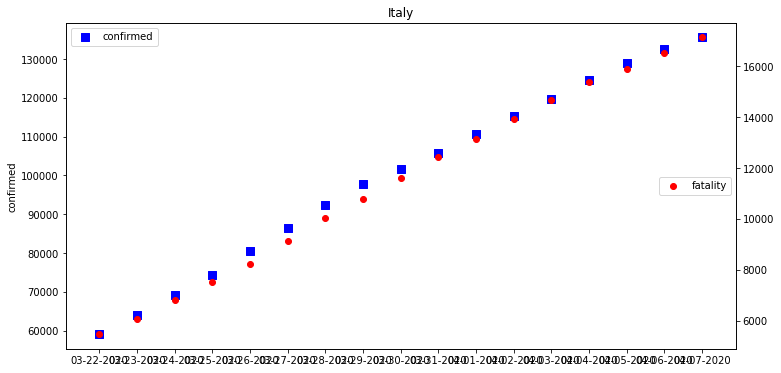

In [9]:
# Plot
fig=plt.figure(figsize=(12,6))
#plt.figure(figsize=(1,1))
ax1=fig.add_subplot(111)
ax1.scatter(confirmed.index, confirmed['Italy'], s=50, c='b', marker="s", label='confirmed')
ax1.set_ylabel('confirmed')
plt.legend(loc="upper left")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('fatality')  # we already handled the x-label with ax1
ax2.scatter(death.index, death['Italy'], c='r', marker="o", label='fatality')
#ax1.scatter(death.index, death['Italy'], s=10, c='r', marker="o", label='second')
plt.legend(loc="center right")
plt.title('Italy')
plt.xlabel('date')
plt.ylabel('fatality')
plt.show()

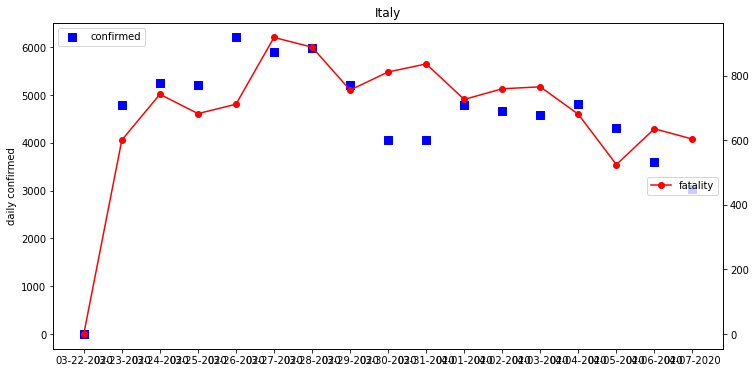

In [8]:
# Plot
fig=plt.figure(figsize=(12,6))
#plt.figure(figsize=(1,1))
ax1=fig.add_subplot(111)
ax1.scatter(confirmed_daily.index, confirmed_daily['Italy'], s=50, c='b', marker="s", label='confirmed')
ax1.set_ylabel('daily confirmed')
plt.legend(loc="upper left")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('daily fatality')  # we already handled the x-label with ax1
ax2.plot(death_daily.index, death_daily['Italy'], c='r', marker="o", label='fatality')
#ax1.scatter(death.index, death['Italy'], s=10, c='r', marker="o", label='second')
plt.legend(loc="center right")
plt.title('Italy')
plt.xlabel('date')
plt.ylabel('')
plt.show()

In [84]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
data=pd.read_csv('COVID-19/sample_data.csv')
data.head()

days  confirmed
0     0        282
1     1        314
2     2        581
3     3        846
4     4       1320

In [85]:
def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

In [137]:
x=data['days']
y_actual=data['confirmed']

In [145]:
#Put initial guest here for the constants.  No need to be precise
b=0
a=1000000
c=0.1
d=10

In [146]:
# After fitting, the constants are returned in a_,b_,c_, and d_
(a_, b_, c_, d_), _ = opt.curve_fit(f, x, y_actual, maxfev=5000,check_finite=True)

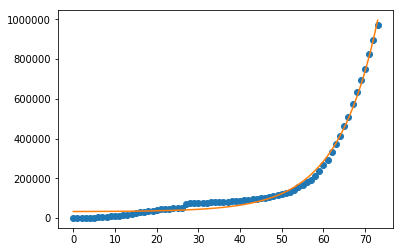

In [147]:
y_fit = f(x, a_, b_, c_, d_)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y_actual, 'o')
ax.plot(x, y_fit, '-')

# Sample to create a chart with altair module

In [ ]:
country=combine.columns[0]
select=pd.DataFrame(combine[country])
title='Confirmed:'+str(int(combine[country][-1]))
chart=alt.Chart(select.reset_index(), title=title).mark_point().encode(
    #x='index:T',
    x=alt.X('index:T', axis=alt.Axis(title='Date')),
    y= country
)

In [ ]:
chart